# ASTR-19 Group Project
This notebook is for the astr-19 group project.

Authors: `Jack O'Brien`, `Leo Constantine`, `Veronica Sanchez M`, `Thomas Liao`


In [4]:
# In this cell, we include libraries
import astropy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

Now, we're parsing the file. It will be returned as two lists containing data from each of the columns.

In [31]:
def ParseFile(_Filename:str = "dataset.txt"):
    
    # Firstly, read it into a list line by line
    Lines:list = []
    with open(_Filename, "r") as F:
        for Line in F:
            Lines.append(Line)
    
    # Now, remove those that start with a '#'
    FilteredLines:list = []
    for Line in Lines:
        if "#" not in Line:
            FilteredLines.append(Line)
            
    # Now parse into arrays
    Column0:list = []
    Column1:list = []
    Column2:list = []
    for Line in FilteredLines:
        Column0.append(Line[:3].replace(" ", ""))
        Column1.append(Line[4:9])
        Column2.append(Line[10:].strip("\n"))
            
    # Return arrays
    return Column0, Column1, Column2


Now, we are going to parse the times in terms of seconds, then sort it based on time.

In [41]:
def SortTimes(_Days:list, _Times:list, _Height:list):
    
    # Firstly, we enumerate times, and convert from hh:mm to seconds
    TimeSeconds:list = []
    for i in range(len(_Times)):
        Day = int(_Days[i]) - 1 # days start at 1, not 0
        Hours = int(_Times[i].split(":")[0])
        Minutes = int(_Times[i].split(":")[1])
        Seconds = (Day * 3600 * 24) + (Hours * 3600) + (Minutes * 60)
        TimeSeconds.append(Seconds)
        
    # Build Tuple For Sorting
    TimePairs:list = []
    for i in range(len(_Height)):
        CurrentTime_s = TimeSeconds[i]
        Height = _Height[i]
        TimePairs.append((CurrentTime_s, float(Height)))
    
    # Now Sort it
    TimePairs = sorted(TimePairs)
    
    # Now resplit it
    XValues = []
    YValues = []
    for Pair in TimePairs:
        XValues.append(Pair[0])
        YValues.append(Pair[1])
    
    
    return XValues, YValues


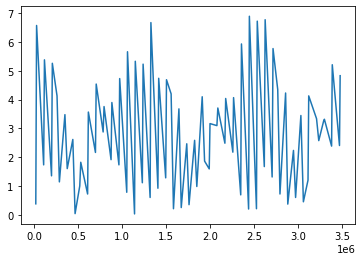

In [42]:
def Main():
    Days, TimesRaw, WaveHeights = ParseFile()
    Timestamps, WaveHeights = SortTimes(Days, TimesRaw, WaveHeights)

    plt.plot(Timestamps, WaveHeights)

if __name__ == "__main__":
    Main()